# ELECTRICITY PRICE ANALYSIS

## IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## convert data from xlsx to datetime

In [2]:
data = pd.read_excel('merge_file_EnEx.xlsx', dtype = ({'time': np.dtype(str) , 'price': np.float64}))
data = data.set_index('time')
data.index = pd.to_datetime(data.index)
data

,price
time,
2020-11-01 00:00:00,59.52
2020-11-01 01:00:00,59.01
2020-11-01 02:00:00,59.01
2020-11-01 03:00:00,59.01
2020-11-01 04:00:00,59.01
...,...
2023-02-28 19:00:00,194.18
2023-02-28 20:00:00,174.69
2023-02-28 21:00:00,159.57


## null values of data

In [3]:
np.where(np.isnan(data))

(array([ 3551, 12287], dtype=int64), array([0, 0], dtype=int64))

In [4]:
data.iloc[3551] = data.iloc[3551-168]

In [5]:
data.iloc[12287] = data.iloc[12287-168]

In [6]:
np.where(np.isnan(data))

(array([], dtype=int64), array([], dtype=int64))

## DATA ANALYSIS

## plot data

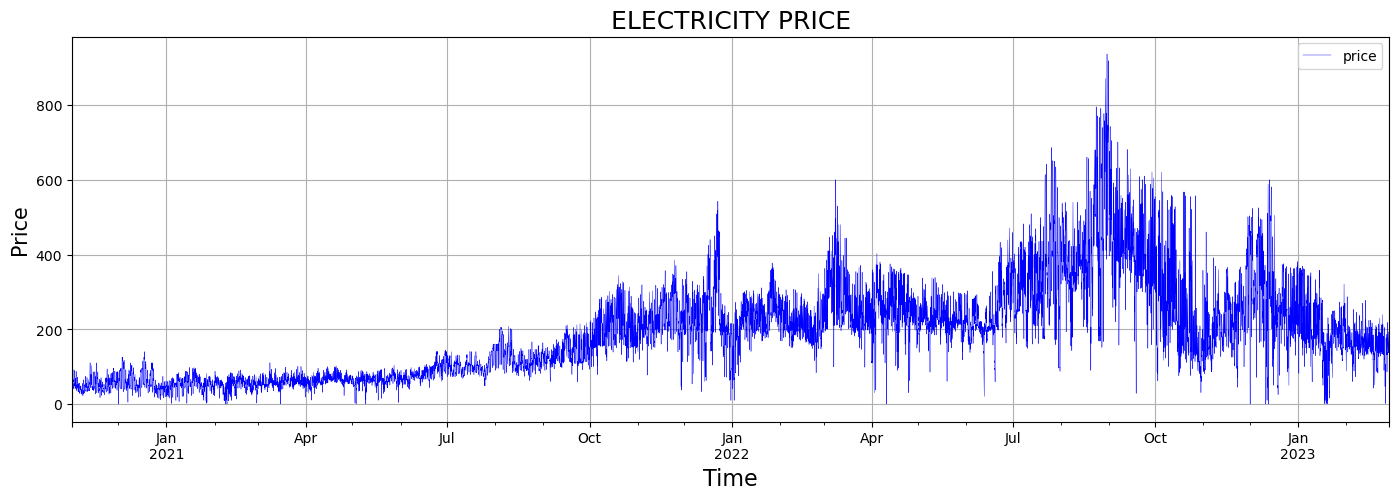

In [7]:
data.plot(style='-', figsize=(17,5), color='blue', linewidth=0.3)
plt.xlabel('Time', fontsize = 16)
plt.ylabel('Price', fontsize = 15)
plt.title('ELECTRICITY PRICE', fontsize= 18)
plt.grid()
plt.show()

## plot data frequency

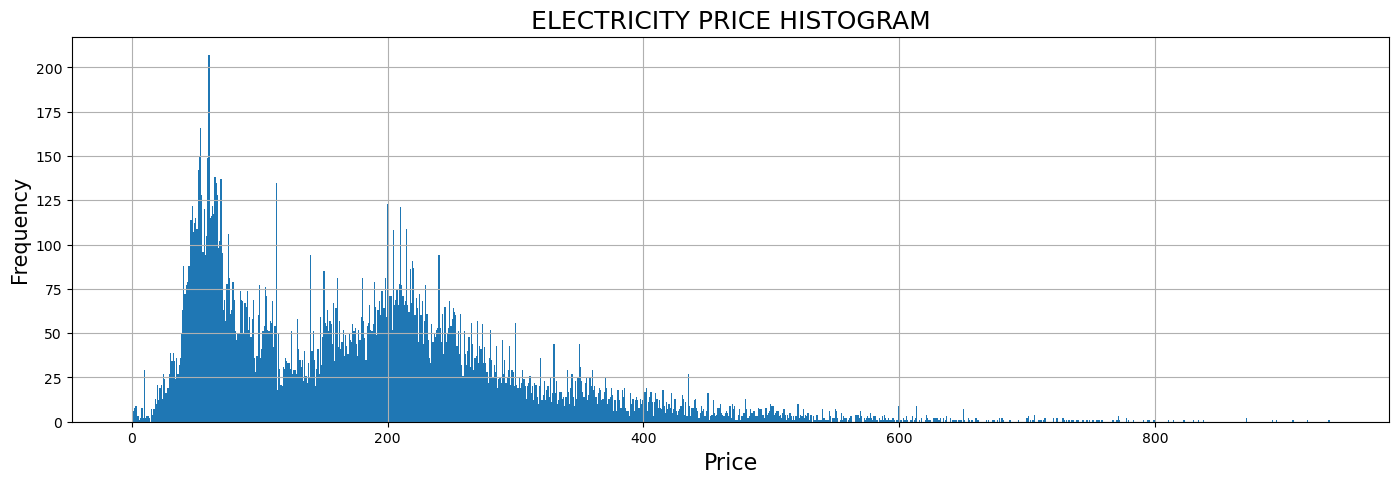

In [8]:
data['price'].plot(kind='hist', bins=1000, figsize=(17,5))
plt.xlabel('Price', fontsize = 16)
plt.ylabel('Frequency', fontsize = 15)
plt.title('ELECTRICITY PRICE HISTOGRAM', fontsize= 18)
plt.grid()
plt.show()

## main stats of data

In [9]:
data.describe()

,price
count,20400.000000
mean,186.341882
std,125.008085
min,-0.010000
25%,77.015000
50%,175.685000
75%,250.395000
max,936.330000


## box plot

In [10]:
bpdata = data.copy()

In [11]:
#feature creation
def create_features(bpdata):
    bpdata['hour'] = bpdata.index.hour
    bpdata['dayofweek'] = bpdata.index.dayofweek
    bpdata['dayofmonth'] = bpdata.index.day
    bpdata['weekofyear'] = bpdata.index.week
    bpdata['month'] = bpdata.index.month
    bpdata['quarter'] = bpdata.index.quarter
    return bpdata

In [12]:
bpdata = create_features(bpdata)

C:\Users\hlias\AppData\Local\Temp\ipykernel_22052\2800386100.py:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  bpdata['weekofyear'] = bpdata.index.week


In [13]:
bpdata['hour']= bpdata['hour']+1
bpdata['dayofweek'] = bpdata['dayofweek']+1

In [14]:
bpdata 

,price,hour,dayofweek,dayofmonth,weekofyear,month,quarter
time,,,,,,,
2020-11-01 00:00:00,59.52,1,7,1,44,11,4
2020-11-01 01:00:00,59.01,2,7,1,44,11,4
2020-11-01 02:00:00,59.01,3,7,1,44,11,4
2020-11-01 03:00:00,59.01,4,7,1,44,11,4
2020-11-01 04:00:00,59.01,5,7,1,44,11,4
...,...,...,...,...,...,...,...
2023-02-28 19:00:00,194.18,20,2,28,9,2,1
2023-02-28 20:00:00,174.69,21,2,28,9,2,1
2023-02-28 21:00:00,159.57,22,2,28,9,2,1


In [15]:
def boxplot(X):
    fig, ax = plt.subplots(figsize=(5,3))
    plt.grid()
    sns.boxplot(data=bpdata, x= X, y='price')

### hourly box plot

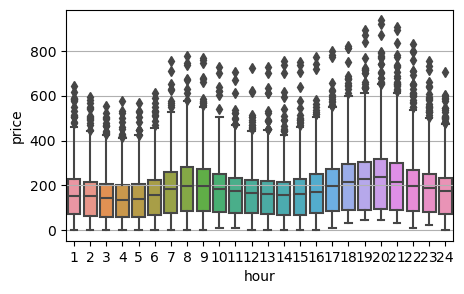

In [16]:
boxplot('hour')

### daily of week box plot

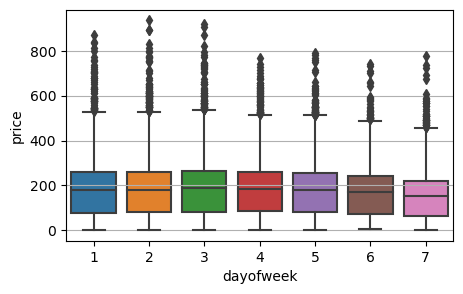

In [17]:
boxplot('dayofweek')

### daily of month box plot

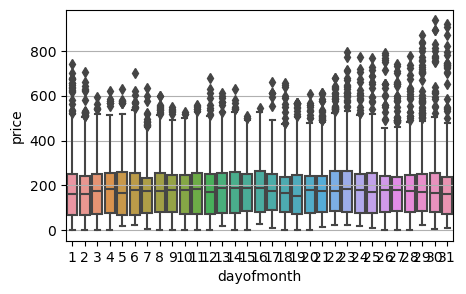

In [18]:
boxplot('dayofmonth')

### weekly of year box plot

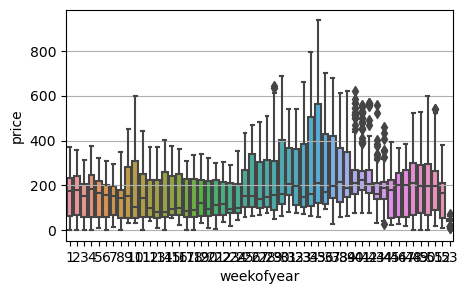

In [19]:

boxplot('weekofyear')

### monthly box plot

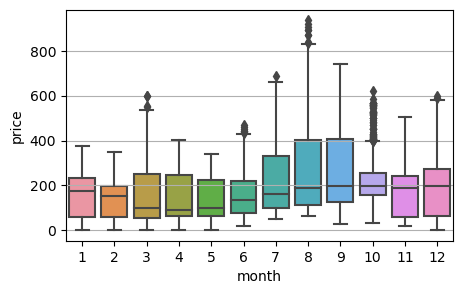

In [20]:
boxplot('month')

### quarterly box plot

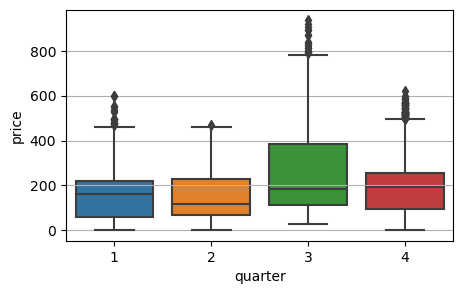

In [21]:
boxplot('quarter')

## data lineplots

In [22]:
D_data = data.resample('D').mean()
W_data = data.resample('W').mean()
M_data = data.resample('M').mean()
Q_data = data.resample('Q').mean()

### hour-day of week lineplot

<AxesSubplot:xlabel='hour', ylabel='price'>

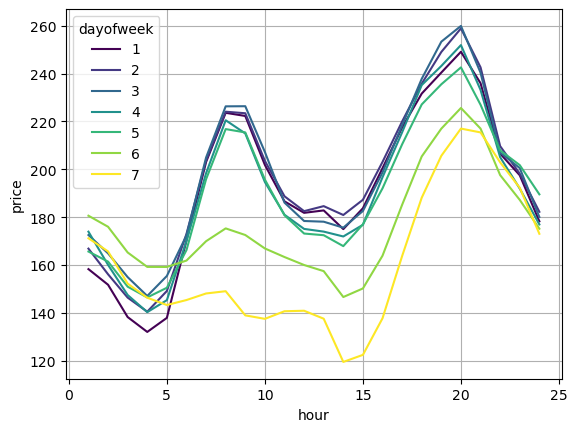

In [23]:
plt.grid()
sns.lineplot(data=bpdata, y="price", x='hour', hue = 'dayofweek' ,err_style=None,palette='viridis')

### day of week-quarter lineplot

<AxesSubplot:xlabel='dayofweek', ylabel='price'>

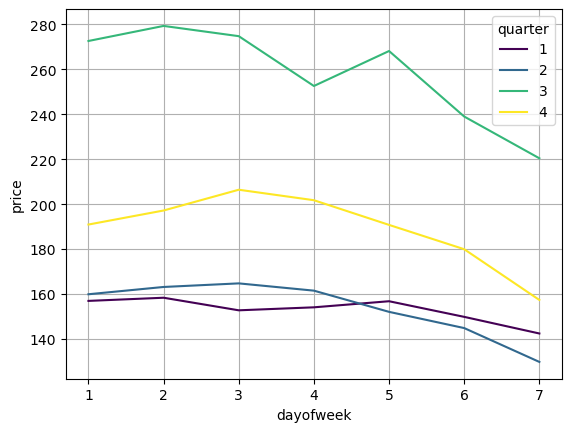

In [24]:
plt.grid()
sns.lineplot(data=bpdata, y="price", x='dayofweek',hue='quarter',err_style=None,palette='viridis')

## seasonality

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


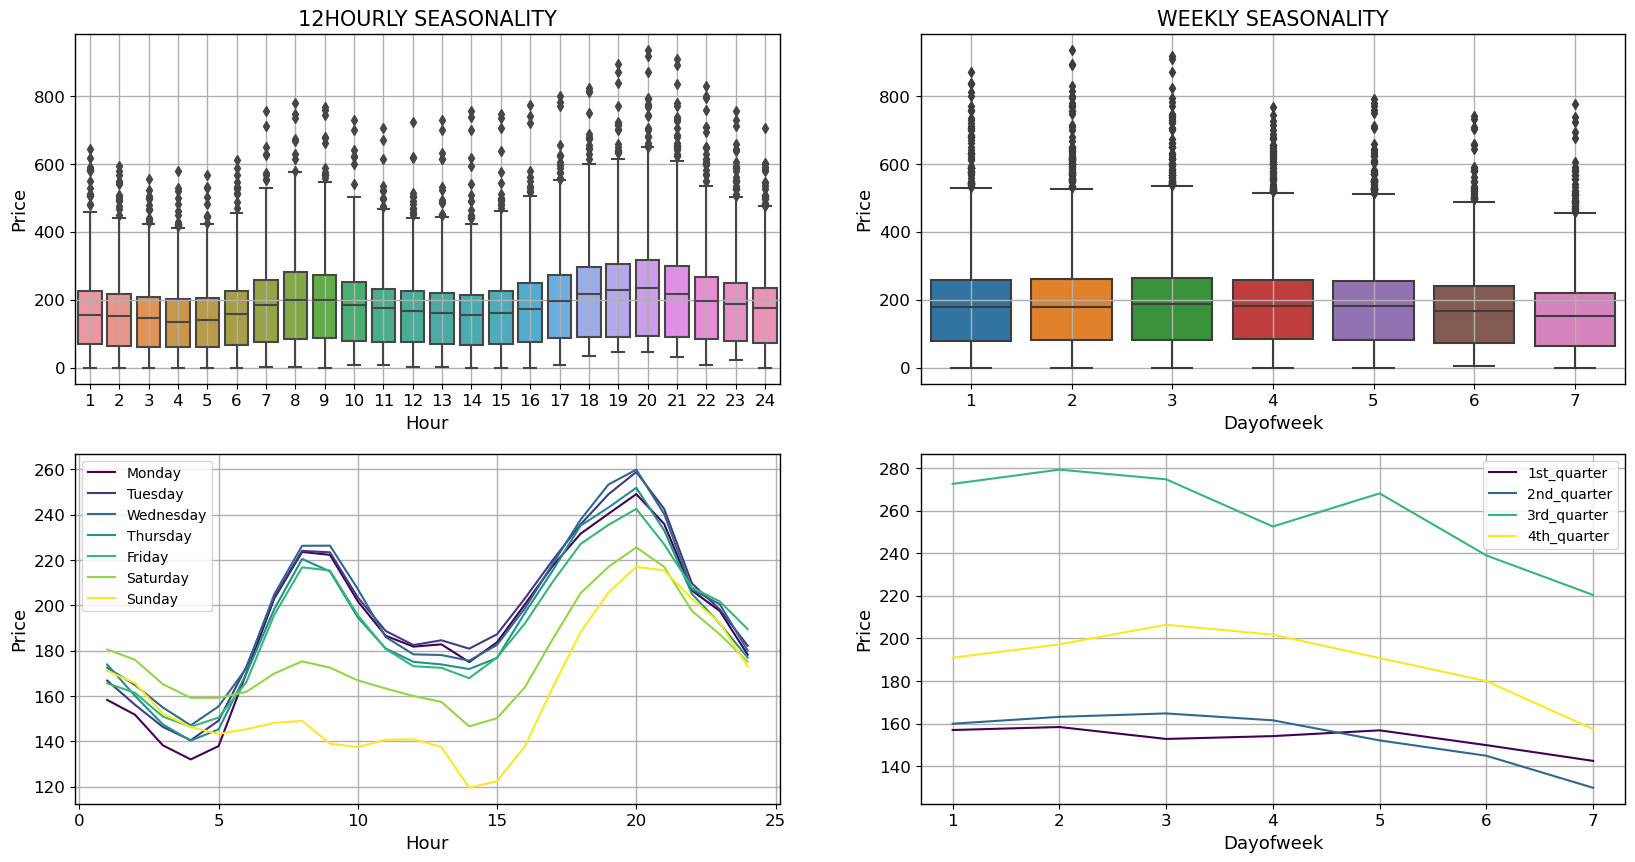

In [26]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, figsize=(20,10))

#daily boxplot
sns.boxplot(data=bpdata, x= 'hour', y='price', ax=ax1)
ax1.set_xlabel('Hour', fontsize = 13)
ax1.xaxis.set_tick_params(labelsize=12)
ax1.set_ylabel('Price', fontsize = 13)
ax1.yaxis.set_tick_params(labelsize=12)
ax1.set_title('12HOURLY SEASONALITY', fontsize= 15)
ax1.legend().set_visible(False)
ax1.grid(linewidth=1)
ax1.spines['top'].set_linewidth(1)
ax1.spines['right'].set_linewidth(1)
ax1.spines['left'].set_linewidth(1)
ax1.spines['bottom'].set_linewidth(1)

#weekly boxplot
sns.boxplot(data=bpdata, x= 'dayofweek', y='price', ax=ax2)
ax2.set_xlabel('Dayofweek', fontsize = 13)
ax2.xaxis.set_tick_params(labelsize=12)
ax2.set_ylabel('Price', fontsize = 13)
ax2.yaxis.set_tick_params(labelsize=12)
ax2.set_title('WEEKLY SEASONALITY', fontsize= 15)
ax2.legend().set_visible(False)
ax2.grid(linewidth=1)
ax2.spines['top'].set_linewidth(1)
ax2.spines['right'].set_linewidth(1)
ax2.spines['left'].set_linewidth(1)
ax2.spines['bottom'].set_linewidth(1)

#daily lineplot
sns.lineplot(data=bpdata, y="price", x='hour', hue = 'dayofweek' ,err_style=None,palette='viridis', ax=ax3)
ax3.set_xlabel('Hour', fontsize = 13)
ax3.xaxis.set_tick_params(labelsize=12)
ax3.set_ylabel('Price', fontsize = 13)
ax3.yaxis.set_tick_params(labelsize=12)
ax3.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax3.grid(linewidth=1)
ax3.spines['top'].set_linewidth(1)
ax3.spines['right'].set_linewidth(1)
ax3.spines['left'].set_linewidth(1)
ax3.spines['bottom'].set_linewidth(1)

#weekly lineplot
sns.lineplot(data=bpdata, y="price", x='dayofweek',hue='quarter',err_style=None,palette='viridis', ax=ax4)
ax4.set_xlabel('Dayofweek', fontsize = 13)
ax4.xaxis.set_tick_params(labelsize=12)       
ax4.set_ylabel('Price', fontsize = 13)
ax4.yaxis.set_tick_params(labelsize=12)
ax4.legend(['1st_quarter', '2nd_quarter', '3rd_quarter', '4th_quarter'])
ax4.grid(linewidth=1)
ax4.spines['top'].set_linewidth(1)
ax4.spines['right'].set_linewidth(1)
ax4.spines['left'].set_linewidth(1)
ax4.spines['bottom'].set_linewidth(1)